<a href="https://colab.research.google.com/github/yashdabhade1/Leather-Defect-Detection-using-DL/blob/main/Defectdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded=files.upload()

Saving p13.jpg to p13.jpg


# **Image Preprocessing**

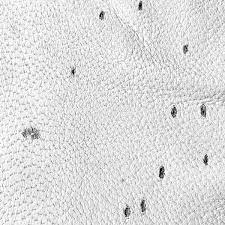

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread("p13.jpg",0)
cv2_imshow(img)

In [ ]:
img.shape

(225, 225)

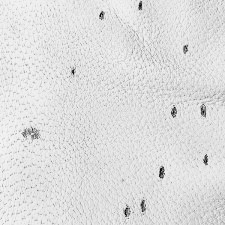

In [ ]:
img1 = cv2.bilateralFilter(img, 28, 19, 20)  #to remove pattern and keep defects intact
cv2_imshow(img1)    

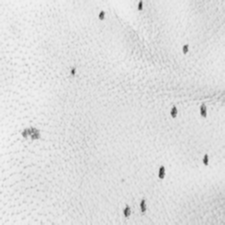

In [ ]:
img2 = cv2.GaussianBlur(img1, (3,3), 0)
cv2_imshow(img2)

thresh1



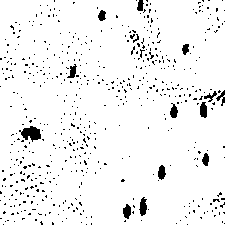

thresh2



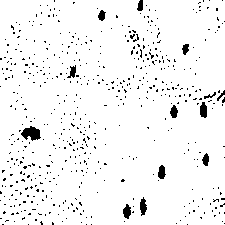

original Image



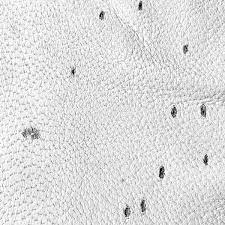

In [ ]:
adaptive_thresh1 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 63, 12)
adaptive_thresh2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 93, 12)
print("thresh1\n")
cv2_imshow(adaptive_thresh1)
print("thresh2\n")
cv2_imshow(adaptive_thresh2)
print("original Image\n")
cv2_imshow(img)

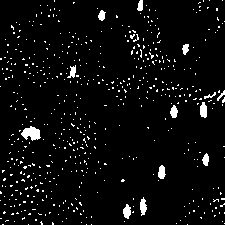

In [ ]:
img3 = cv2.bitwise_not(adaptive_thresh2)
cv2_imshow(img3)

# **Defect Detection**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if sys.path[0] == '':


Number of Defects in LoG= 12
Number of Defects in DoF= 16
Number of Defects in DoH= 11


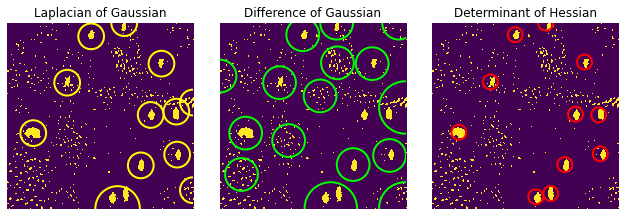

In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import io
from PIL import Image
import matplotlib.pyplot as plt
import cv2


image = img3
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, min_sigma=11, max_sigma=35, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, min_sigma=14, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, min_sigma=9, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()
ccc=0

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    xxx=0

    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        if r>1:
            xxx=xxx+1    
        ax[idx].add_patch(c)
    if idx==1:
        ccc=xxx
    ax[idx].set_axis_off()
    mini=min(ccc,xxx)
    if idx==0:
      print('Number of Defects in LoG=', xxx)
    elif idx==1:
      print("Number of Defects in DoF=", xxx)
    elif idx==2:
      print("Number of Defects in DoH=", xxx)
    # print(xxx)
# print(mini)
plt.tight_layout()
plt.show()


# **Counting Contours**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  # This is added back by InteractiveShellApp.init_path()


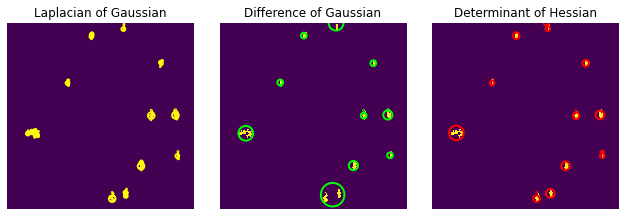

In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
import cv2 as cv


image = img3
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()